# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [3]:
import chess
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [4]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [5]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is pair, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [6]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [8]:
Stockfish_path = "C:/Users/Margarida/Desktop/NOVA/2sem/RL/Project/stockfish_15.1_win_x64_avx2\stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [9]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is pair, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [10]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

In [ ]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=5)

In [ ]:
df.head(5)

# Ready to Play Chess?

In [1]:
## Monte Carlo

In [36]:
## MONTE CARLO

In [11]:
import chess
import chess.engine
import chess.svg
from IPython.display import SVG
import math
import random

class Node:
    def __init__(self, move=None, parent=None, state=None):
        self.move = move # The move that leads to this node
        self.parent = parent # Parent node
        self.children = [] # Child nodes
        self.wins = 0 # Number of wins after simulations
        self.visits = 0 # Number of times the node has been visited
        self.untried_moves = list(state.legal_moves) if state else []  # Untried moves from this state

    def select_child(self):
        # Use UCB1 formula () to select the child with the highest UCB value (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjr29GthK__AhXqR6QEHbWKAwgQFnoECBoQAQ&url=https%3A%2F%2Fieor8100.github.io%2Fmab%2FLecture%25203.pdf&usg=AOvVaw0RZpgEMI5JpoHfKc43vycx)
        return max(self.children, key=lambda c: c.wins / c.visits + math.sqrt(2 * math.log(self.visits) / c.visits))

    def expand(self, state):
        # Take an untried move, create a new state, and add a child node
        move = self.untried_moves.pop()
        new_state = state.copy()
        new_state.push(move)
        child_node = Node(move=move, parent=self, state=new_state)
        self.children.append(child_node)
        return child_node

    def update(self, result):
        # Update the wins and visits count of the node
        self.visits += 1
        self.wins += result

def simulate(state):
    # Simulate a game from the current state until the end
    while not state.is_game_over():
        # Choose a random move from the legal moves
        move = random.choice(list(state.legal_moves))
        state.push(move)
    return get_result(state)

def get_result(state):
    # Calculate the result of the game (1 for a win, -1 for a loss, 0 for a draw)
    if state.is_checkmate():
        if state.turn:
            return -1
        else:
            return 1
    else:
        return 0

def monte_carlo_tree_search(state, simulations):
    root = Node(state=state) # Create the root node with the current state

    for _ in range(simulations):
        node = root
        temp_state = state.copy()

        # Selection: Traverse the tree until an unexplored node is found or reach a leaf node
        while node.untried_moves == [] and node.children != []:
            node = node.select_child()
            temp_state.push(node.move)

        # Expansion: Expand the tree by creating a new child node
        if node.untried_moves:
            node = node.expand(temp_state)

        # Simulation: Simulate a game from the current state
        result = simulate(temp_state)

        # Backpropagation: Update the nodes' statistics from the current node to the root
        while node is not None:
            node.update(result)
            node = node.parent

    # Select the move with the highest visit count
    return max(root.children, key=lambda c: c.visits).move

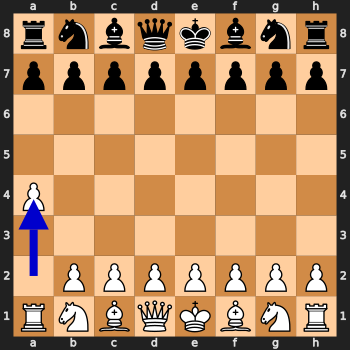

Move: a2a4


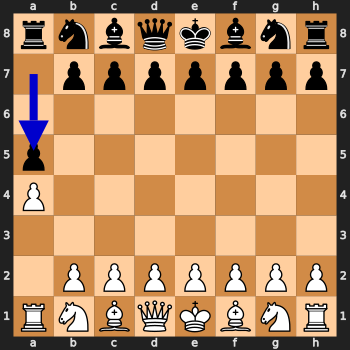

Move: a7a5


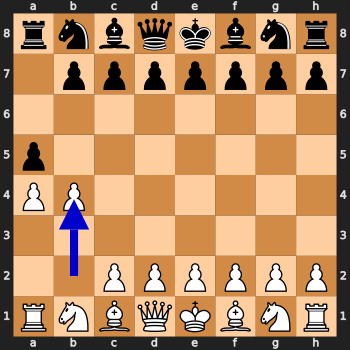

Move: b2b4


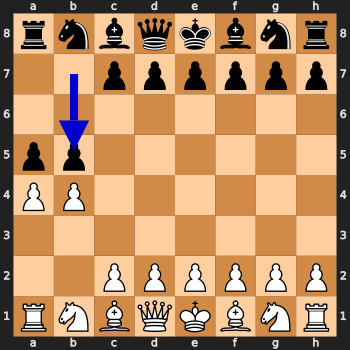

Move: b7b5


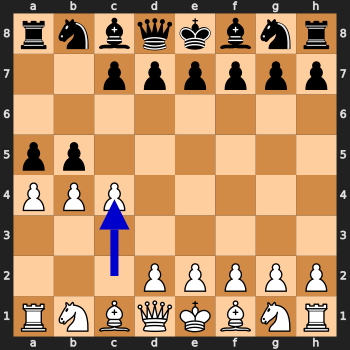

Move: c2c4


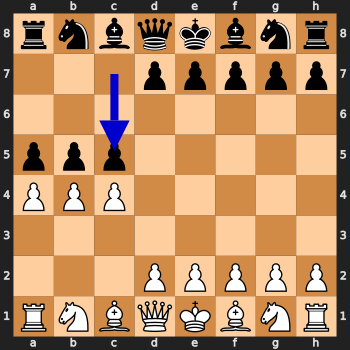

Move: c7c5


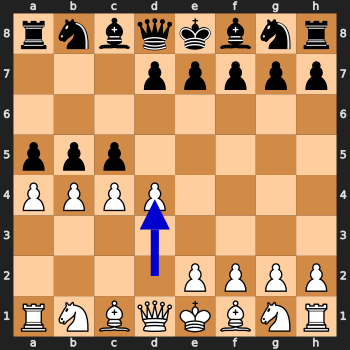

Move: d2d4


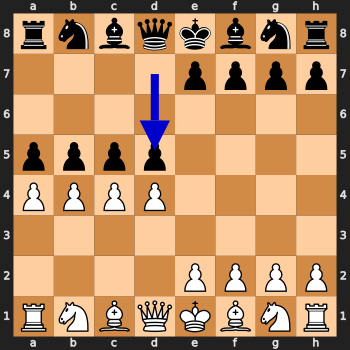

Move: d7d5


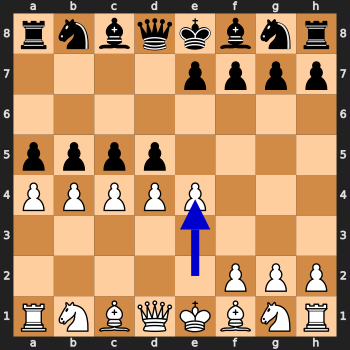

Move: e2e4


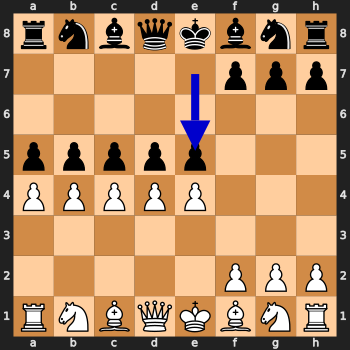

Move: e7e5


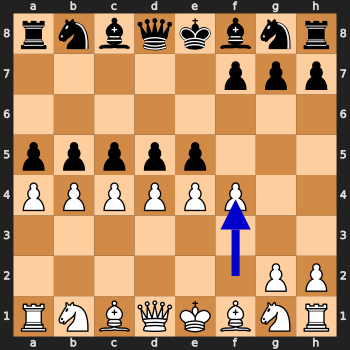

Move: f2f4


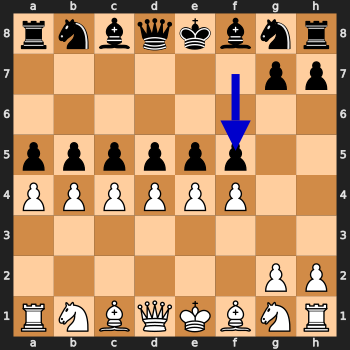

Move: f7f5


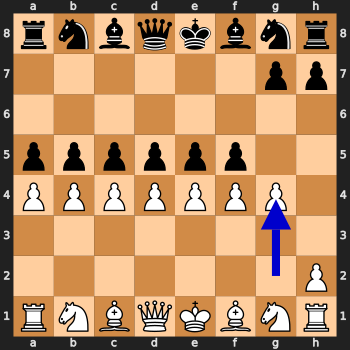

Move: g2g4


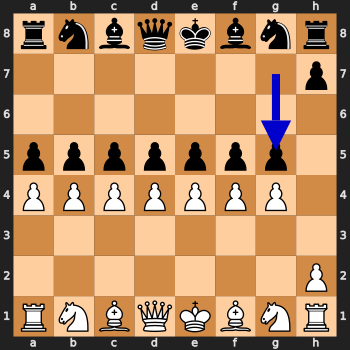

Move: g7g5


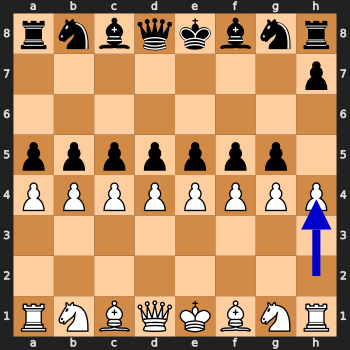

Move: h2h4


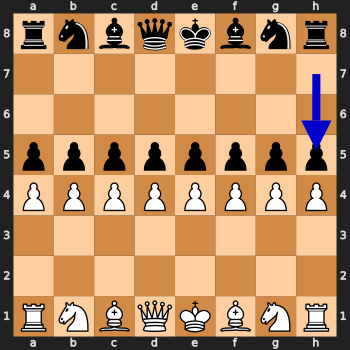

Move: h7h5


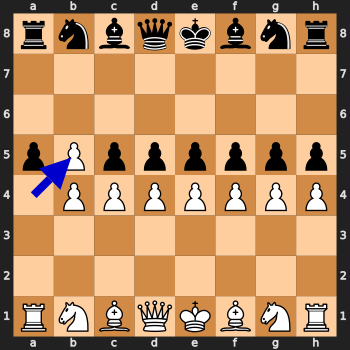

Move: a4b5


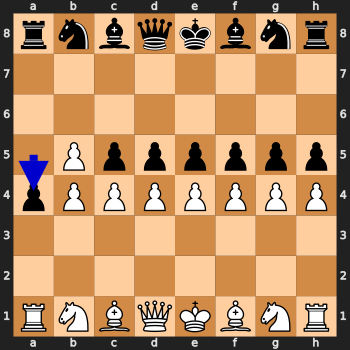

Move: a5a4


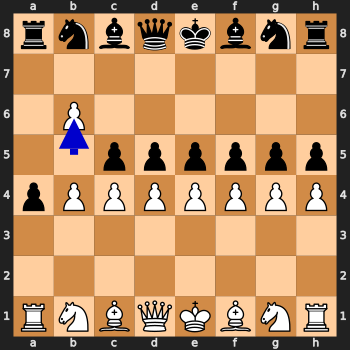

Move: b5b6


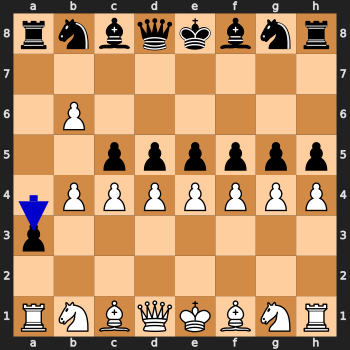

Move: a4a3


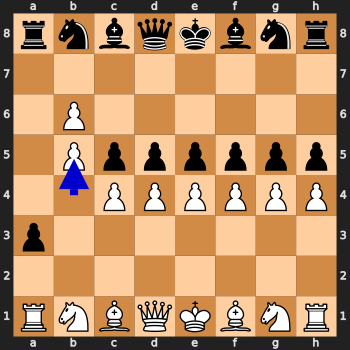

Move: b4b5


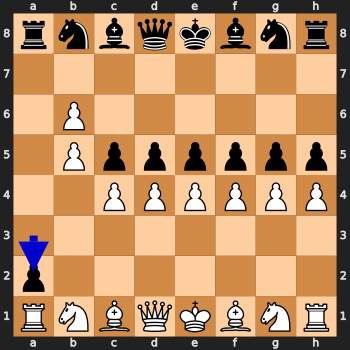

Move: a3a2


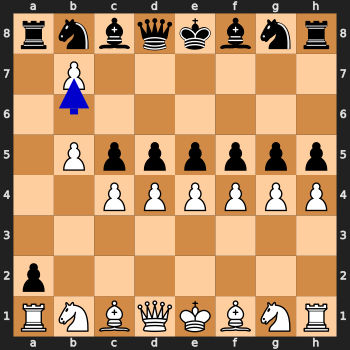

Move: b6b7


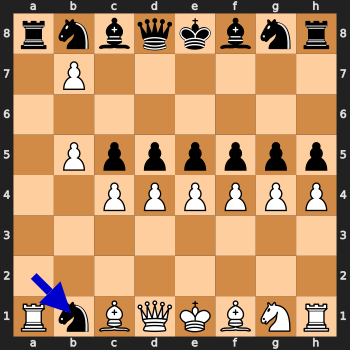

Move: a2b1n


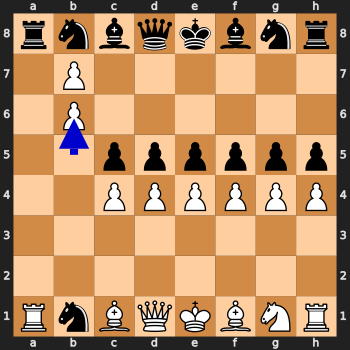

Move: b5b6


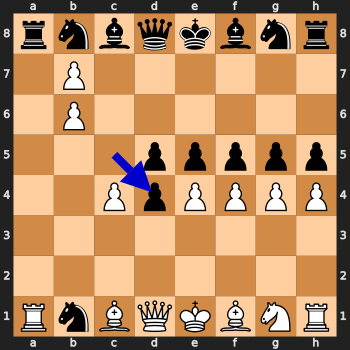

Move: c5d4


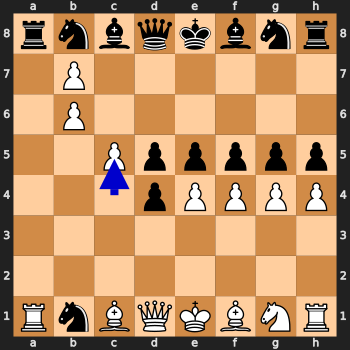

Move: c4c5


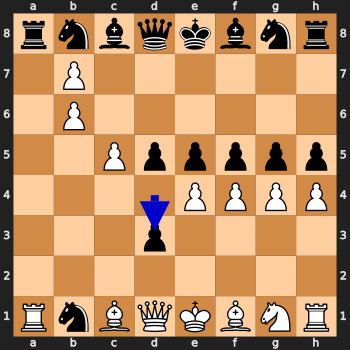

Move: d4d3


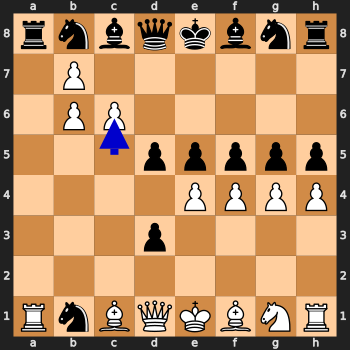

Move: c5c6


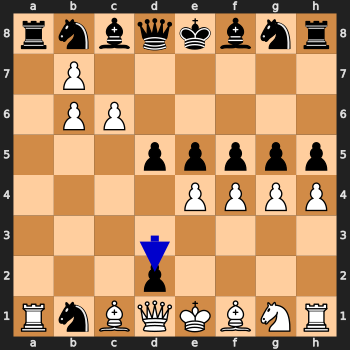

Move: d3d2


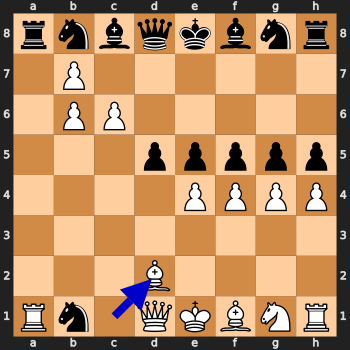

Move: c1d2


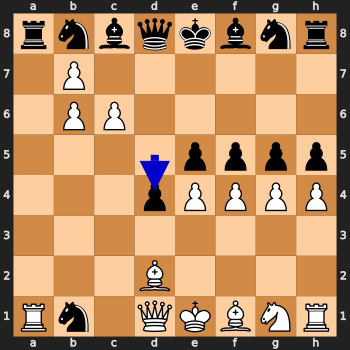

Move: d5d4


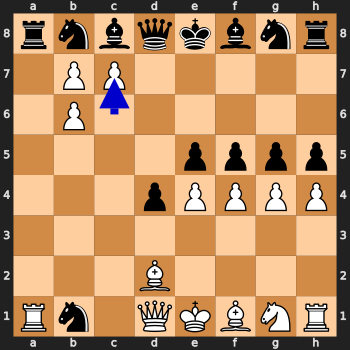

Move: c6c7


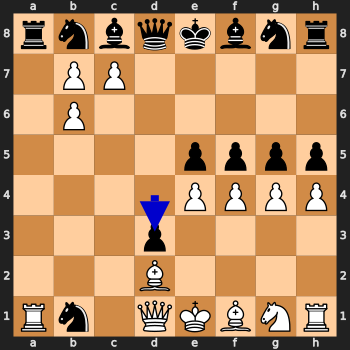

Move: d4d3


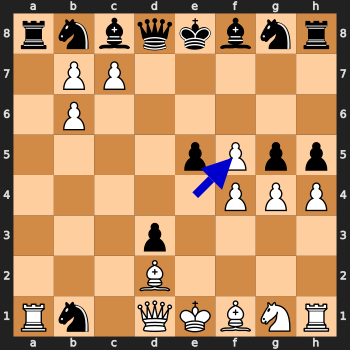

Move: e4f5


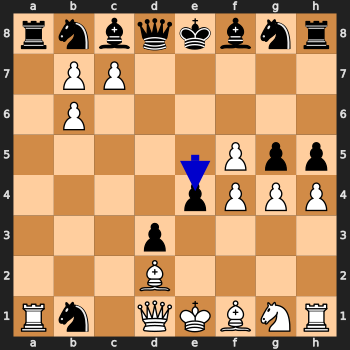

Move: e5e4


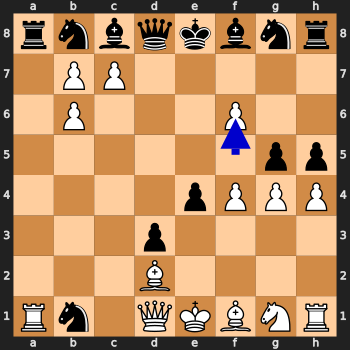

Move: f5f6


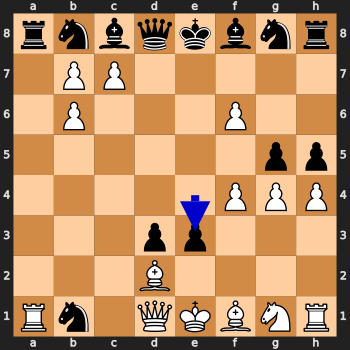

Move: e4e3


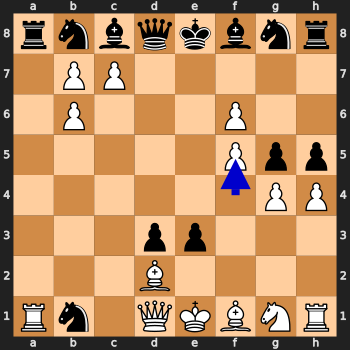

Move: f4f5


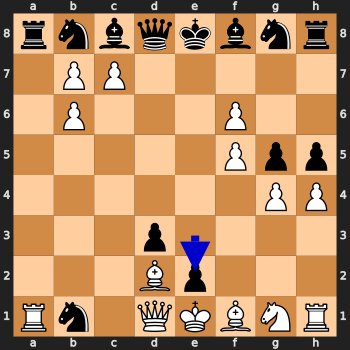

Move: e3e2


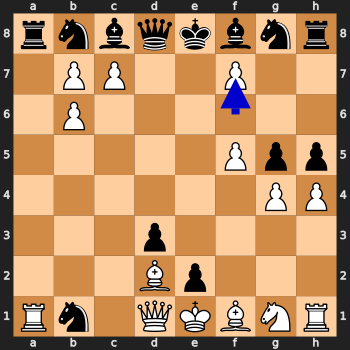

Move: f6f7


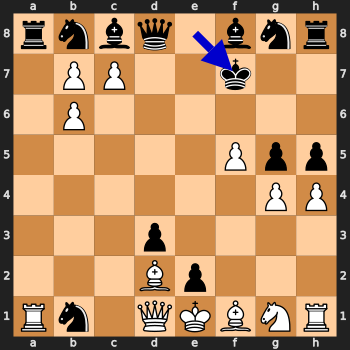

Move: e8f7


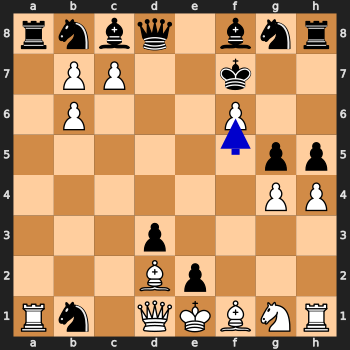

Move: f5f6


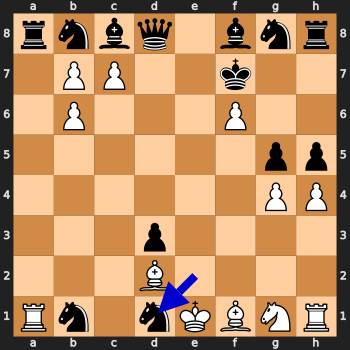

Move: e2d1n


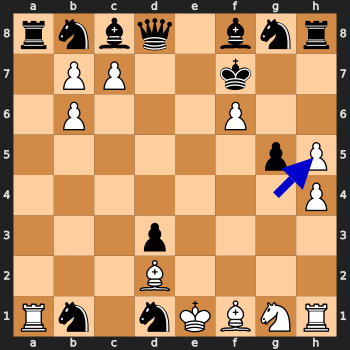

Move: g4h5


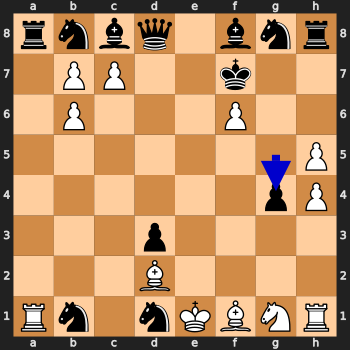

Move: g5g4


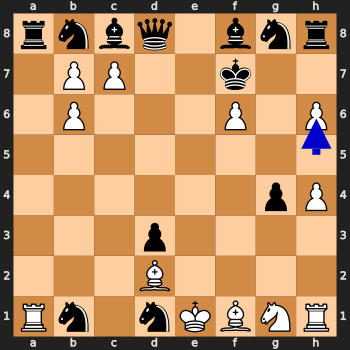

Move: h5h6


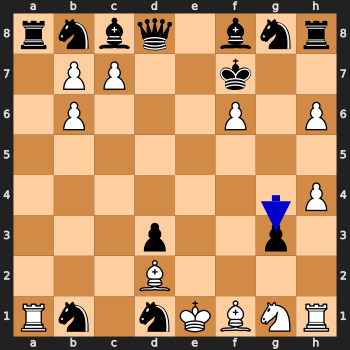

Move: g4g3


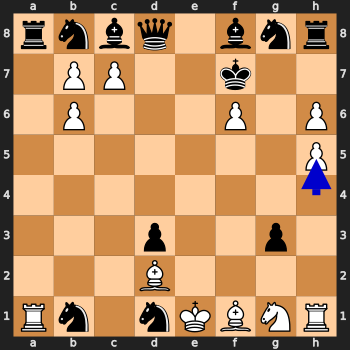

Move: h4h5


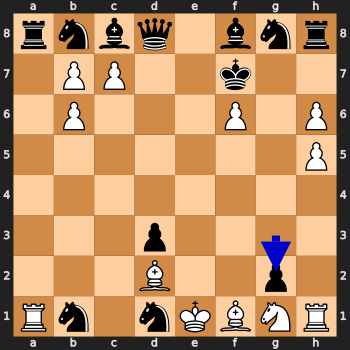

Move: g3g2


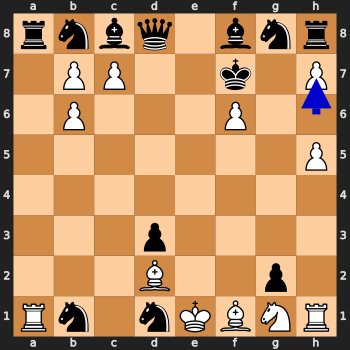

Move: h6h7


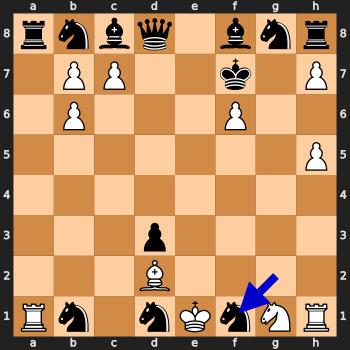

Move: g2f1n


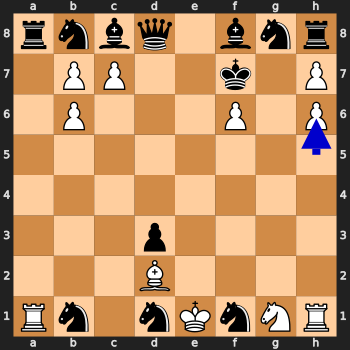

Move: h5h6


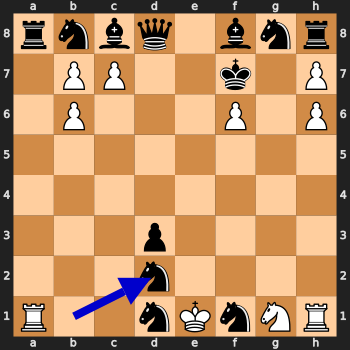

Move: b1d2


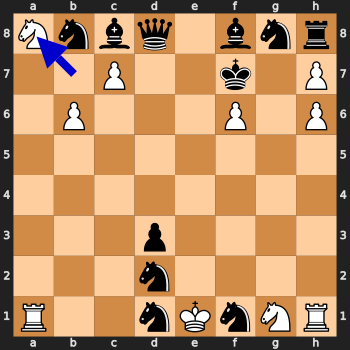

Move: b7a8n


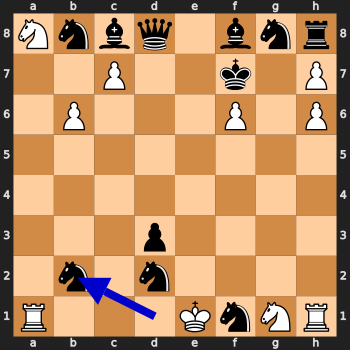

Move: d1b2


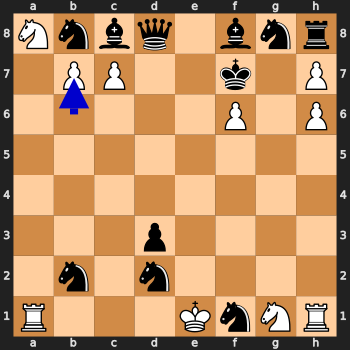

Move: b6b7


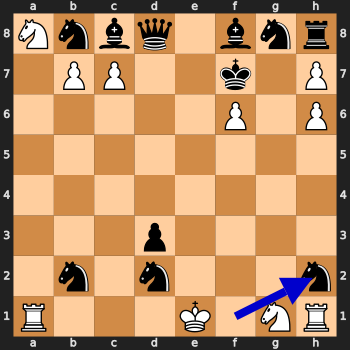

Move: f1h2


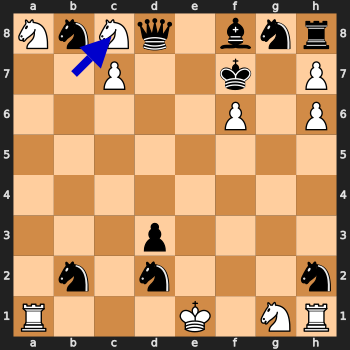

Move: b7c8n


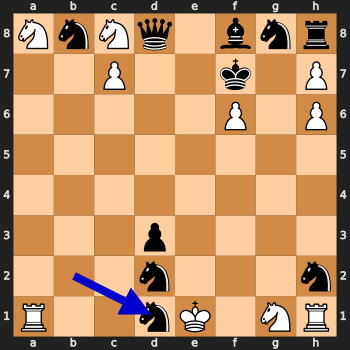

Move: b2d1


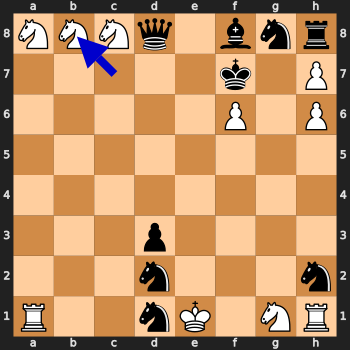

Move: c7b8n


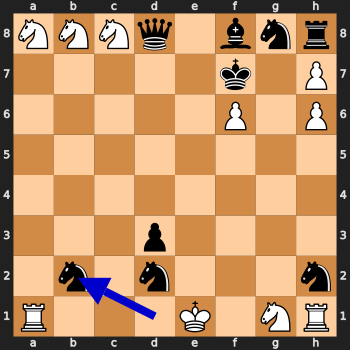

Move: d1b2


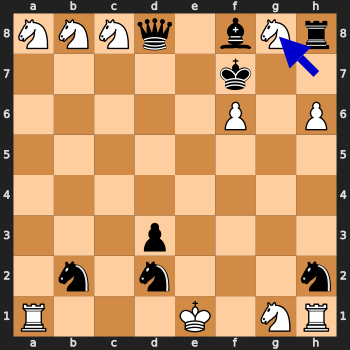

Move: h7g8n


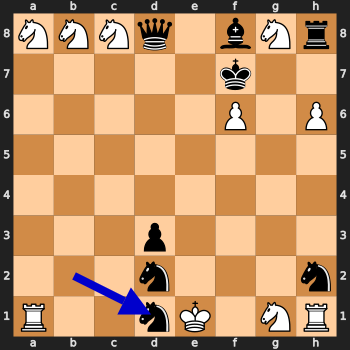

Move: b2d1


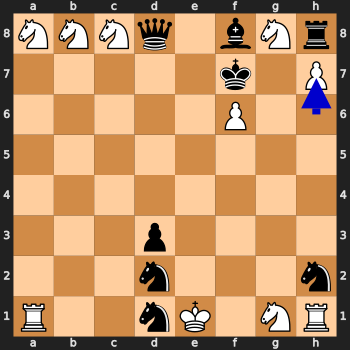

Move: h6h7


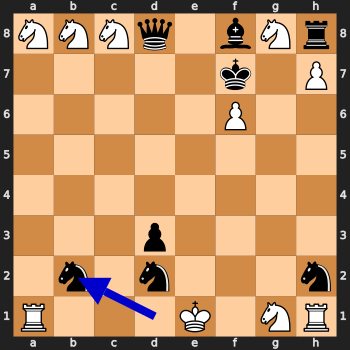

Move: d1b2


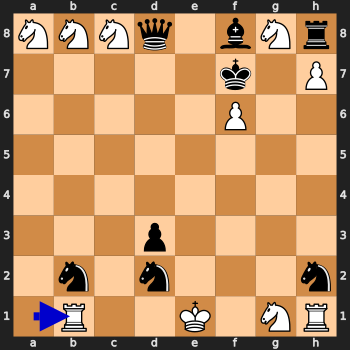

Move: a1b1


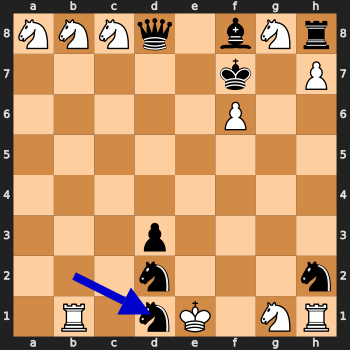

Move: b2d1


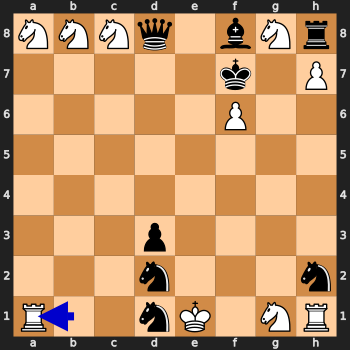

Move: b1a1


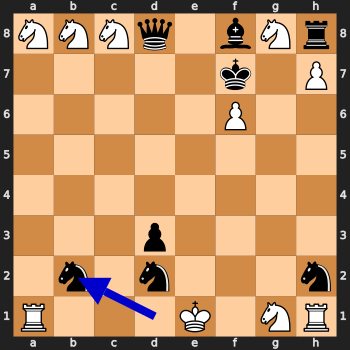

Move: d1b2


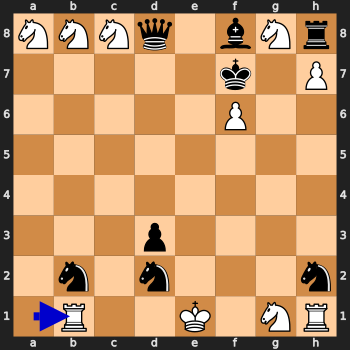

Move: a1b1


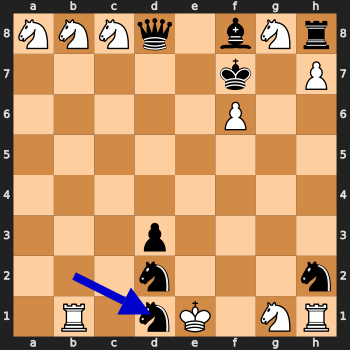

Move: b2d1


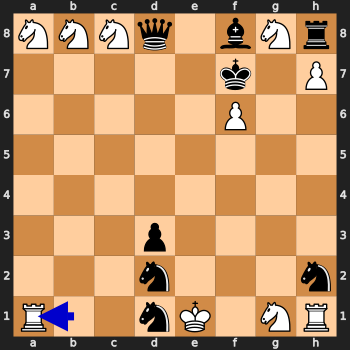

Move: b1a1


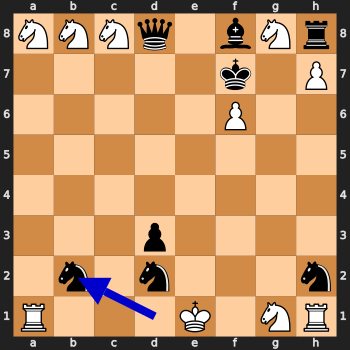

Move: d1b2


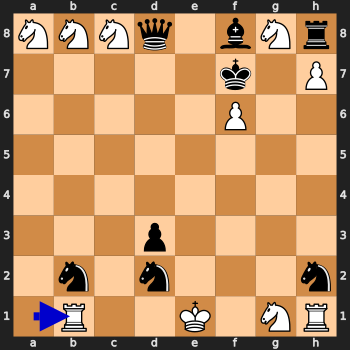

Move: a1b1


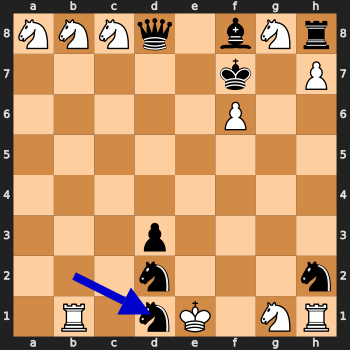

Move: b2d1


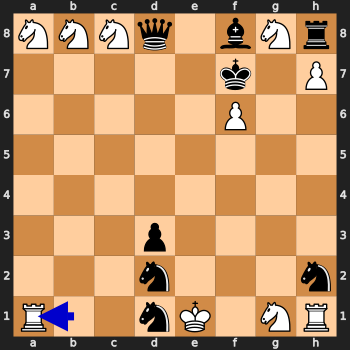

Move: b1a1


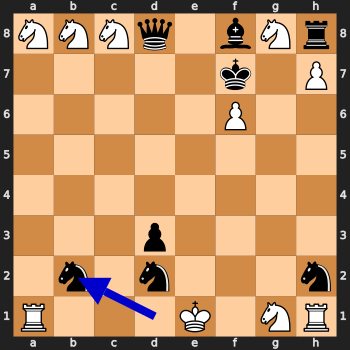

Move: d1b2


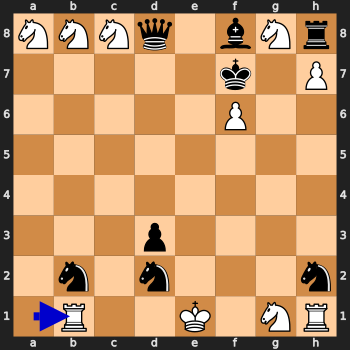

Move: a1b1


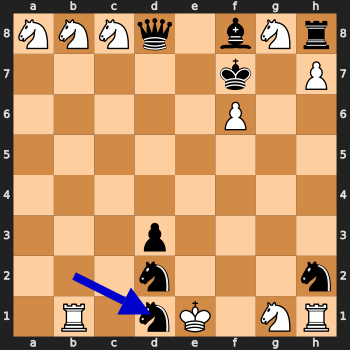

Move: b2d1


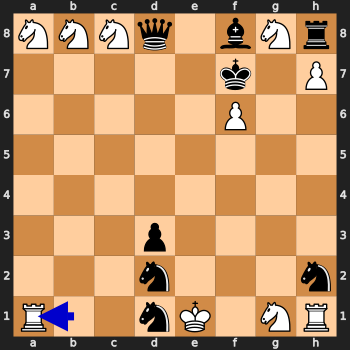

Move: b1a1


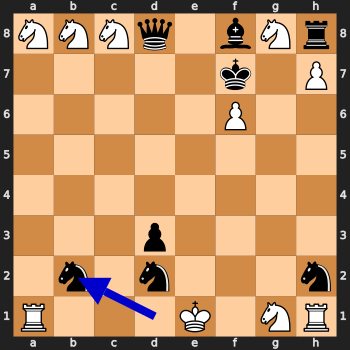

Move: d1b2


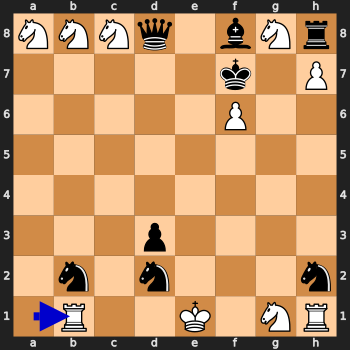

Move: a1b1
1/2-1/2


In [12]:
board = chess.Board()

while not board.is_game_over():
    # Perform MCTS to choose the best move
    move = monte_carlo_tree_search(board, simulations=10)

    # Make the chosen move
    board.push(move)
    a = chess.svg.board(
         board,
         arrows=[chess.svg.Arrow(move.from_square, move.to_square, color="#0000cccc")],
         size=350,
    )  
    display(SVG(a))
    print("Move:", move)
    
print(board.result())

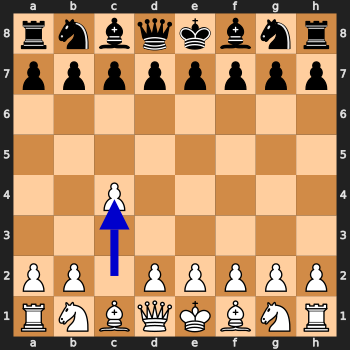

Move: c2c4


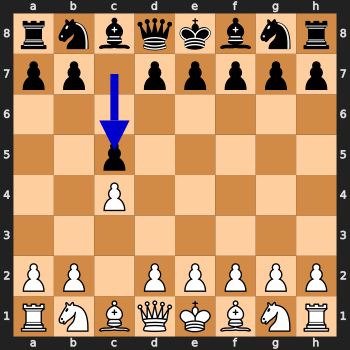

Move: c7c5


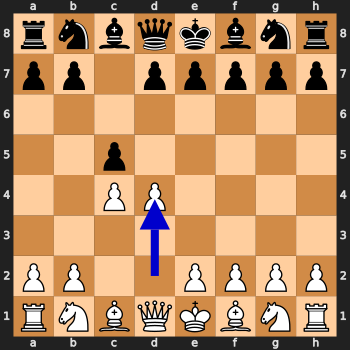

Move: d2d4


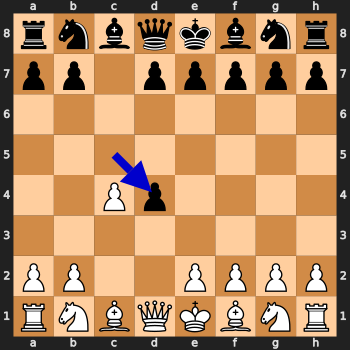

Move: c5d4


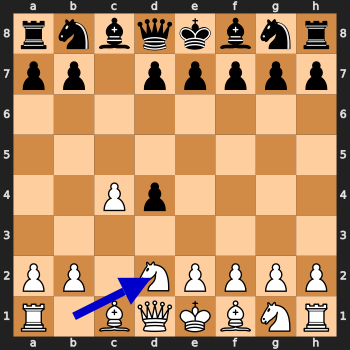

Move: b1d2


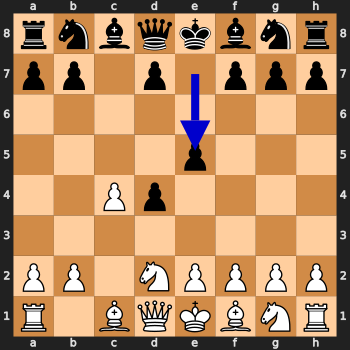

Move: e7e5


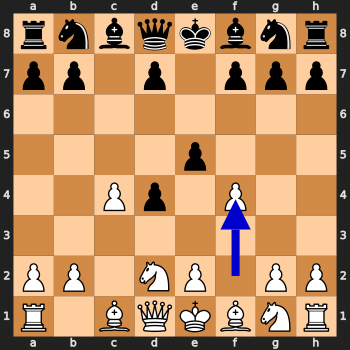

Move: f2f4


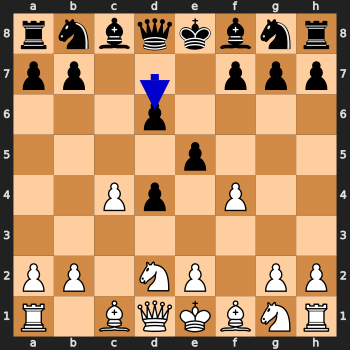

Move: d7d6


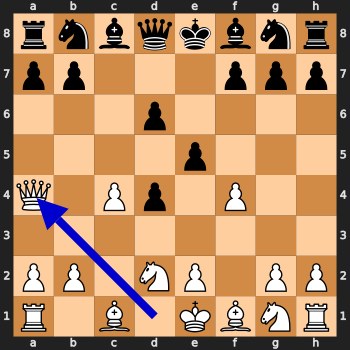

Move: d1a4


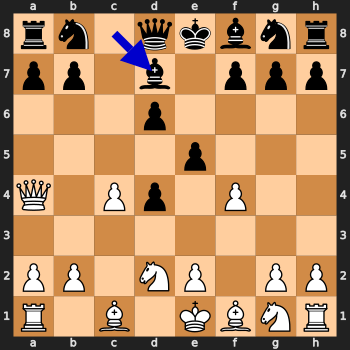

Move: c8d7


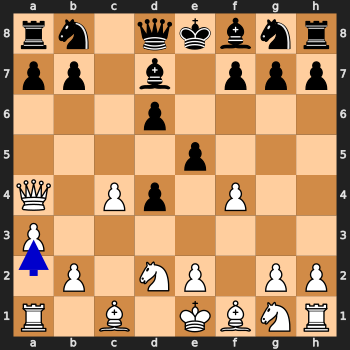

Move: a2a3


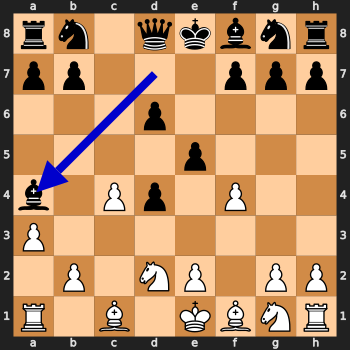

Move: d7a4


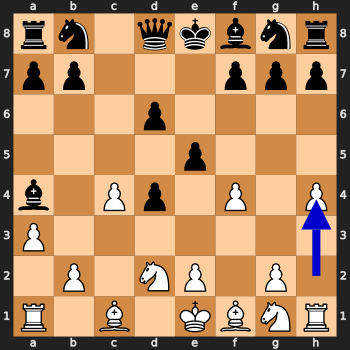

Move: h2h4


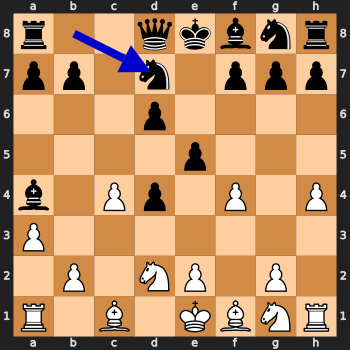

Move: b8d7


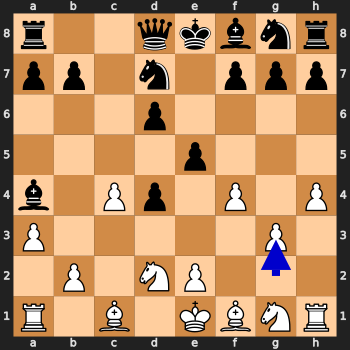

Move: g2g3


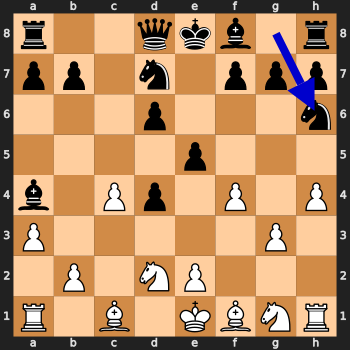

Move: g8h6


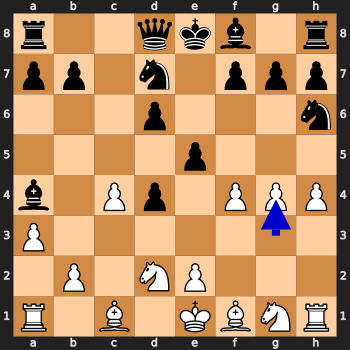

Move: g3g4


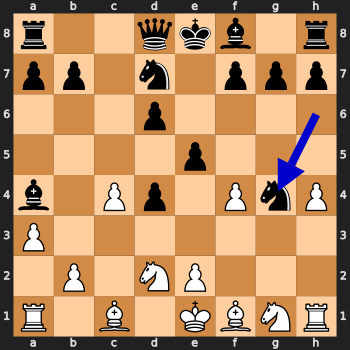

Move: h6g4


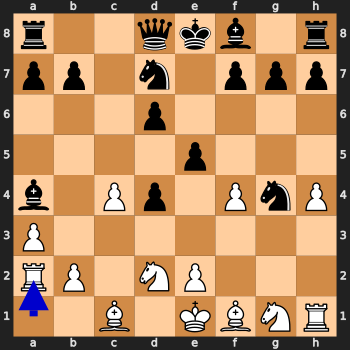

Move: a1a2


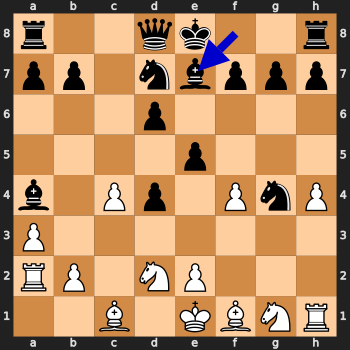

Move: f8e7


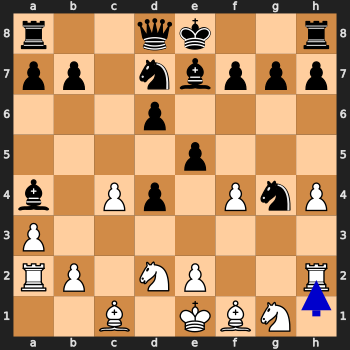

Move: h1h2


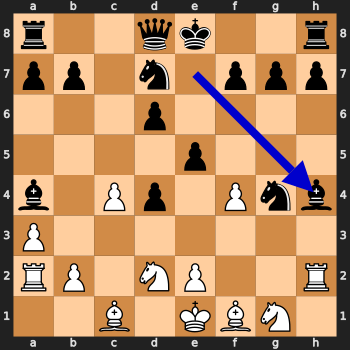

Move: e7h4


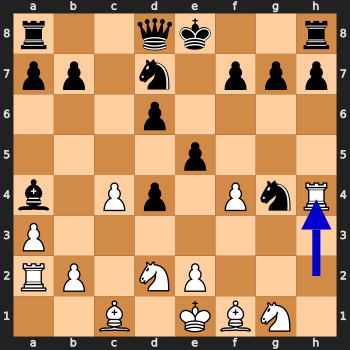

Move: h2h4


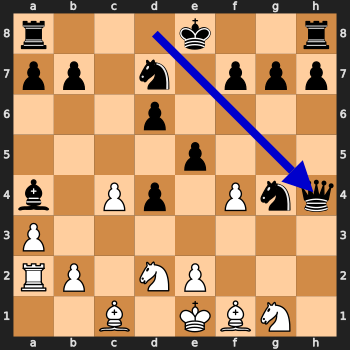

Move: d8h4
0-1


In [13]:
 # Example usage
board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci(Stockfish_path)

while not board.is_game_over():
    if board.turn:
        move = monte_carlo_tree_search(board, simulations=100)
    else:
        result = engine.play(board, chess.engine.Limit(time=.000001))
        move = result.move

    board.push(move)
    a = chess.svg.board(
         board,
         arrows=[chess.svg.Arrow(move.from_square, move.to_square, color="#0000cccc")],
         size=350,
    )  
    display(SVG(a))
    print("Move:", move)
engine.quit()

print(board.result())

In [18]:
env_name = 'ChessAlphaZero-v0'
env = gym.make(env_name)

df = monte_carlo_tree_search( state = env.reset() ,simulations=5)

env.close()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
df.head()

AttributeError: 'function' object has no attribute 'head'